<a href="https://colab.research.google.com/github/tranghorn88/CS5720_Home_Assignment_2/blob/main/Home_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Implement Convolution with Different Stride and Padding

# Import libraries
import numpy as np
import tensorflow as tf

# Define the 5x5 matrix as requested in the assignment
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32).reshape(1, 5, 5, 1)  #(batch, height, width, channels)

# Define the 3x3 kernel as requested in the assignment
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32).reshape(3, 3, 1, 1)  #(kernel_height, kernel_width, input_channels, output_filters)
def apply_convolution(input_matrix, kernel, stride, padding):
  return tf.nn.conv2d(input_matrix, filters=kernel, strides=[1, stride, stride, 1],padding=padding).numpy().squeeze()

# Run convolution with specified configurations
result_set = {
    "Stride=1, Padding='VALID'": apply_convolution(input_matrix, kernel, 1, 'VALID'),
    "Stride=1, Padding='SAME'": apply_convolution(input_matrix, kernel, 1, 'SAME'),
    "Stride=2, Padding='VALID'": apply_convolution(input_matrix, kernel, 2, 'VALID'),
    "Stride=2, Padding='SAME'": apply_convolution(input_matrix, kernel, 2, 'SAME')
}

# Print outputs
for key, output in result_set.items():
  print(f"\n{key} Output:\n{output}")


Stride=1, Padding='VALID' Output:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride=1, Padding='SAME' Output:
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride=2, Padding='VALID' Output:
[[0. 0.]
 [0. 0.]]

Stride=2, Padding='SAME' Output:
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


Image loaded. Shape: (512, 512)


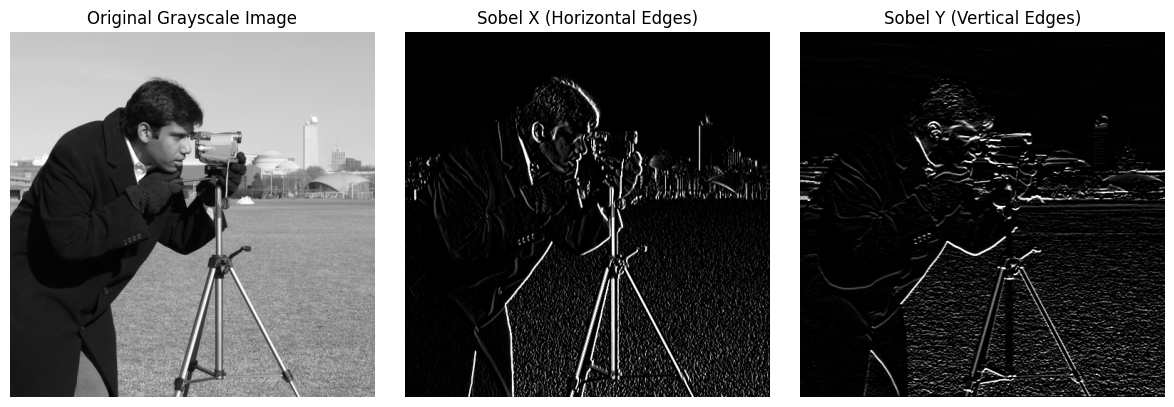

In [5]:
### Implement Edge Detection Using Convolution

import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Load grayscale image from a direct image URL
image_url = "https://raw.githubusercontent.com/scikit-image/scikit-image/main/skimage/data/camera.png"

# Read the image from URL
resp = urllib.request.urlopen(image_url)  # Fetches the raw binary data from the image URL
image_data = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE)

# Validate the image
if image is None:
  raise ValueError("Failed to load the image")
else:
  print(f"Image loaded. Shape: {image.shape}")

# Define sobel filters
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]

], dtype=np.float32)

# Apply Sobel filters using OpenCV for edge detection in the x-direction and y-direction
edge_x = cv2.filter2D(image, -1, sobel_x)
edge_y = cv2.filter2D(image, -1, sobel_y)

# Display original and filtered images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel X (Horizontal Edges)")
plt.imshow(edge_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel Y (Vertical Edges)")
plt.imshow(edge_y, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


In [2]:
### Implement Max Pooling and Average Pooling

import tensorflow as tf
import numpy as np


# Create a random 4x4 matrix
input_matrix = tf.constant(np.random.randint(0,10, (1, 4, 4, 1)), dtype=tf.float32)

# Apply Max Pooling
max_pool_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')
max_pool = max_pool_layer(input_matrix)

# Apply Average Pooling
avg_pool_layer = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid')
avg_pool = avg_pool_layer(input_matrix)

# Print results
print("Original Matrix:\n", tf.squeeze(input_matrix).numpy())
print("\nMax Pooled Matrix:\n", tf.squeeze(max_pool).numpy())
print("\nAverage Pooled Matrix:\n", tf.squeeze(avg_pool).numpy())


Original Matrix:
 [[7. 7. 9. 1.]
 [3. 0. 2. 1.]
 [3. 5. 5. 2.]
 [5. 6. 8. 8.]]

Max Pooled Matrix:
 [[7. 9.]
 [6. 8.]]

Average Pooled Matrix:
 [[4.25 3.25]
 [4.75 5.75]]


Original Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

After Min-Max Normalization (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

After Z-scor

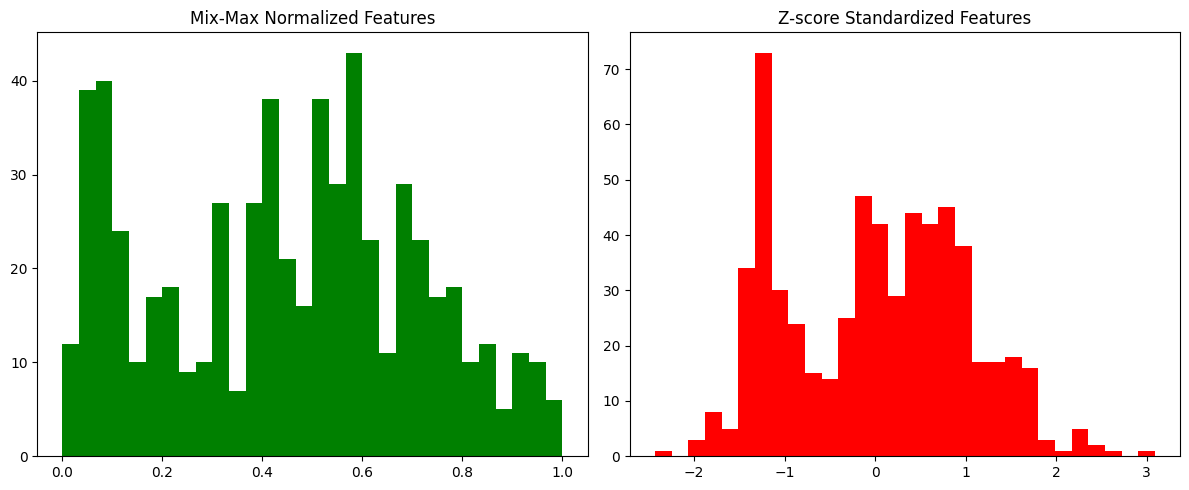


Accuracy - Raw Data: 1.00

Accuracy - Min-Max Normalization: 0.97

Accuracy - Z-score Standard: 1.00


In [15]:
### Explore standardization and normalization techniques on a dataset and analyze their impact

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Original Data (first 5 rows):")
print(X.head())

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

print("\nAfter Min-Max Normalization (first 5 rows):")
print(pd.DataFrame(X_minmax, columns=X.columns).head())

# Z-score Standardization
z_scaler = StandardScaler()
X_zscore = z_scaler.fit_transform(X)
print("\nAfter Z-score Standardization (first 5 rows):")
print(pd.DataFrame(X_zscore, columns=X.columns).head())

# Visualizing distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X_minmax.flatten(), bins=30, color='green')
plt.title("Mix-Max Normalized Features")

plt.subplot(1, 2, 2)
plt.hist(X_zscore.flatten(), bins=30, color='red')
plt.title("Z-score Standardized Features")
plt.tight_layout()
plt.show()

# Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_minmax, X_test_minmax = train_test_split(X_minmax, test_size=0.2, random_state=42)
X_train_z, X_test_z = train_test_split(X_zscore, test_size=0.2, random_state=42)

# Train Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train_raw, y_train)
acc_raw = accuracy_score(y_test, model_raw.predict(X_test_raw))

# Train on normalized data
model_minmax = LogisticRegression(max_iter=200)
model_minmax.fit(X_train_minmax, y_train)
acc_minmax = accuracy_score(y_test, model_minmax.predict(X_test_minmax))

# Train on standardized data
model_z = LogisticRegression(max_iter=200)
model_z.fit(X_train_z, y_train)
acc_z = accuracy_score(y_test, model_z.predict(X_test_z))

# Accuracy comparison
print(f"\nAccuracy - Raw Data: {acc_raw:.2f}")
print(f"\nAccuracy - Min-Max Normalization: {acc_minmax:.2f}")
print(f"\nAccuracy - Z-score Standard: {acc_z:.2f}")
